Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4911 - acc: 0.8277
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3752 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3390 - acc: 0.8765
Epoch 4/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3152 - acc: 0.8852
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2962 - acc: 0.8905
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


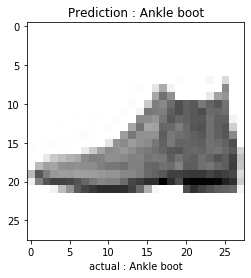

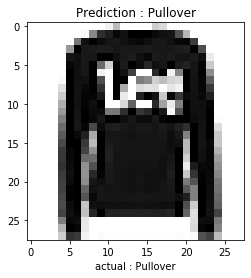

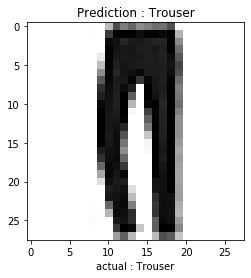

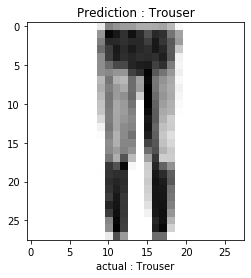

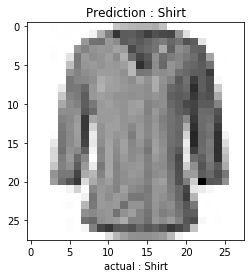

In [2]:
# Image Classification

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0


model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5)

model.save("model_image_classification.h5")


#model = keras.models.load_model("model_image_classification.h5")


prediction = model.predict(test_images)

for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("actual : " + class_names[test_labels[i]])
    plt.title("Prediction : " + class_names[np.argmax(prediction[i])])
    plt.show()

In [3]:
# Text Classification

import tensorflow as tf
from tensorflow import keras
import numpy as np

data = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=88000)

word_index = data.get_word_index()
word_index = {k:(v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding="post", maxlen=250)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding="post", maxlen=250)

def decode_review(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

def review_encode(s):
    encoded = [1]

    for word in s:
        if word.lower() in word_index:
            encoded.append(word_index[word.lower()])
        else:
            encoded.append(2)
    return encoded

model = keras.Sequential()
model.add(keras.layers.Embedding(88000, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

x_val = train_data[:10000]
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

fitModel = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

results = model.evaluate(test_data, test_labels)
print(results)

model.save("model_text_classification.h5")

#model = keras.models.load_model("model_text_classification.h5")

with open("test.txt", encoding="utf-8") as f:
    for line in f.readlines():
        nline = line.replace(",", "").replace(".", "").replace("(", "").replace(")", "").replace(":", "").replace("\"", "").strip().split(" ")
        encode = review_encode(nline)
        encode = keras.preprocessing.sequence.pad_sequences([encode], value=word_index["<PAD>"], padding="post", maxlen=250)
        predict = model.predict(encode)
        print(line)
        print(encode)
        print(predict[0])

1646592/1641221 [==============================] - 0s 0us/step
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          1408000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,408,289
Trainable params: 1,408,289
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the